In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Boston_crime.csv')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
 # Keep only data from complete years (2018, 2019)
df = df.loc[df['YEAR'].isin([2018,2019])] 
# Keep only data on UCR Part One offenses
df = df.loc[df['UCR_PART'] == 'Part One'] 
# Convert DAY_OF_WEEK to an ordered category
df.DAY_OF_WEEK = pd.Categorical(df.DAY_OF_WEEK, 
categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
ordered=True) 
# Remove unused columns
df = df.drop(['INCIDENT_NUMBER','OFFENSE_CODE'], axis=1) 
df.head()


,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2019,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2019,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
12370,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E13,571,NaN,2019,11,Tuesday,21,Part One,SYLVIA ST,42.310559,-71.102854,"(42.31055889, -71.10285400)"
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"


In [5]:
df.shape

(37538, 14)

### Question-1: Visualize serious Crimes in Boston
    Use a countplot to find the serious crime happening in Boston city

In [16]:
result = df['OFFENSE_CODE_GROUP'].value_counts()
result

Larceny                       15709
Larceny From Motor Vehicle     6707
Aggravated Assault             4769
Residential Burglary           3309
Auto Theft                     2930
Robbery                        2882
Commercial Burglary             863
Other Burglary                  268
Homicide                        101
Name: OFFENSE_CODE_GROUP, dtype: int64

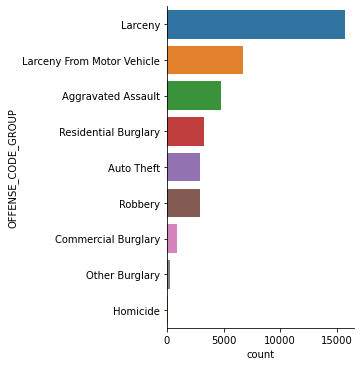

In [26]:
sns.catplot(y='OFFENSE_CODE_GROUP', 
            kind='count', 
            data=df, 
            height=5, 
            aspect=1.0,
           order=result.index)
plt.show()

### Question-2: Occurances of this serious crime by hour

In [27]:
larceny = df[df['OFFENSE_CODE_GROUP'] == 'Larceny']
larceny.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2019,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
14227,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2019,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"
15036,Larceny,LARCENY ALL OTHERS,NaN,,NaN,2019,1,Sunday,12,Part One,MORTON,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
16568,Larceny,LARCENY ALL OTHERS,A1,63,NaN,2019,4,Sunday,21,Part One,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
25550,Larceny,LARCENY THEFT OF BICYCLE,D4,625,NaN,2019,11,Wednesday,0,Part One,QUEENSBERRY ST,42.343144,-71.095893,"(42.34314406, -71.09589305)"


<Figure size 360x720 with 0 Axes>

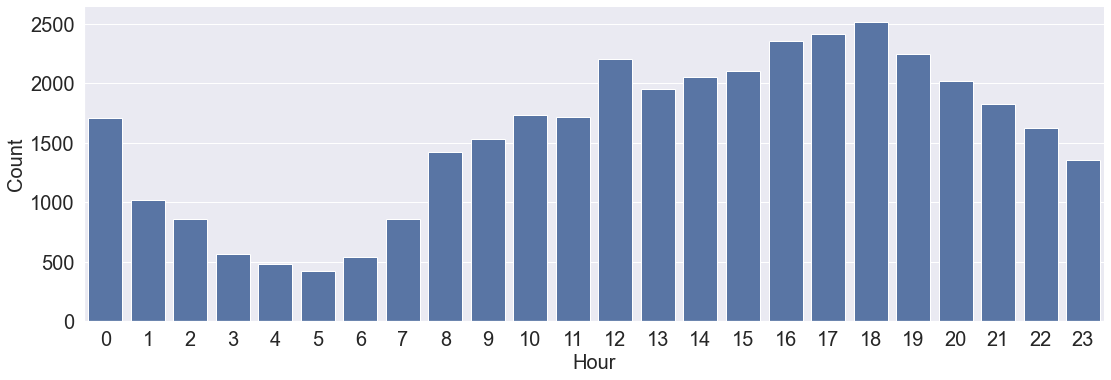

In [50]:
sns.set()
plt.figure(figsize=(5,10))
sns.catplot(x='HOUR', 
            kind='count', 
            data=df, 
            aspect=3.0,
            color='b'
           )
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

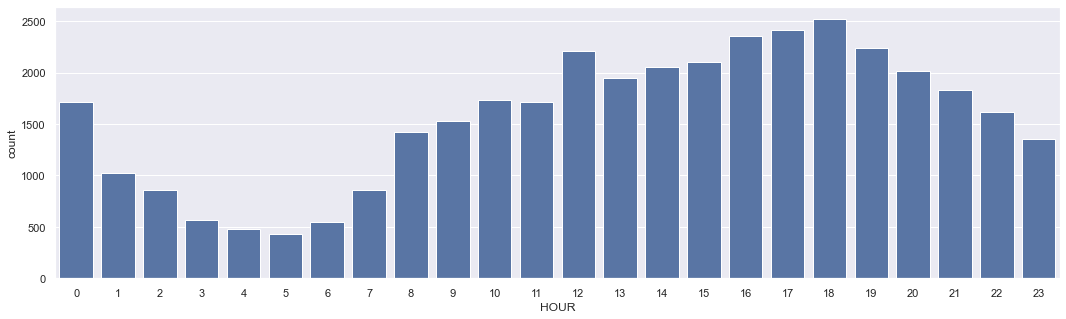

In [56]:
plt.figure(figsize=(18,5))
sns.countplot(df['HOUR'],color='b')
plt.show()

### Question-3: Occurances of this serious crime by day of the week

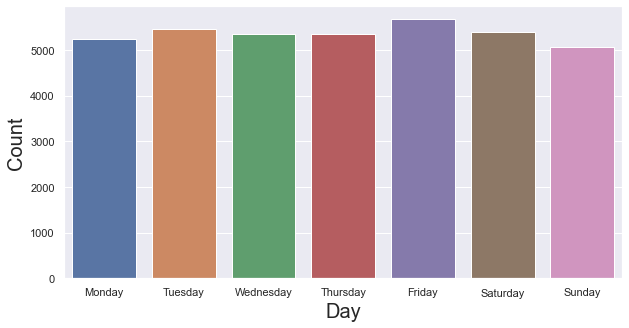

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(df['DAY_OF_WEEK'])
plt.xlabel('Day', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()